# Landscape Ecology

__Evelyn Uuemaa, PhD__

- Course supplement

    Students upload a csv file and can do box-plots based on the file. They are then also able to download the images for reporting.

## How to use this notebook

Highlight the top cell and click the "Run" button to execute the cells and move the program forward. If anything goes wrong, you can easily restart from the beginning.

In [1]:
from IPython.display import display
import ipywidgets as widgets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

%matplotlib inline

In [2]:
upload = widgets.FileUpload( accept='.csv', multiple=False )

csv_delimiter = ","
text_encoding = "utf8"

In [3]:
upload

FileUpload(value={}, accept='.csv', description='Upload')

After you selected the file, the upload field should show (1), that means the file is now selected.

Click on the _next cell_ to continue...

In [4]:
filestream_encoding = "latin1"

t = upload.data[0].decode(encoding=filestream_encoding)

with open('tmp.csv', 'w', encoding=text_encoding) as fh:
    fh.write(t)

df = pd.read_csv('tmp.csv', encoding=text_encoding, delimiter=csv_delimiter)

df.head(10)

,Name,Liik,RunDate,Run,Class,SDI,SEI,AWMSI,MSI,MPAR,MPFD,ED,MPE,MPS,NumP,MedPS,PSCoV,TLA
0,80662_clip,rukkirääk,16.01.2018 15:28:02,1,All,1.850,0.889,1.562,1.542,176.240,1.281,89.116,2799.470,31.414,10.0,23.578,82.803,314.139
1,79202_clip,rukkirääk,16.01.2018 15:28:02,2,All,0.936,0.675,1.752,1.724,334.480,1.307,70.888,4454.041,62.832,5.0,66.056,56.717,314.159
2,79200_clip,rukkirääk,16.01.2018 15:28:02,3,All,0.860,0.621,1.541,1.630,142.683,1.282,67.981,3559.491,52.360,6.0,38.030,86.933,314.159
3,78355_clip,rukkirääk,16.01.2018 15:28:03,4,All,1.495,0.835,1.520,1.657,275.600,1.310,74.101,2909.832,39.268,8.0,21.056,106.491,314.148
4,78354_clip,rukkirääk,16.01.2018 15:28:03,5,All,1.512,0.777,1.856,1.721,209.810,1.305,91.338,2869.440,31.416,10.0,12.886,126.807,314.156
5,77340_clip,rukkirääk,16.01.2018 15:28:03,6,All,1.725,0.785,1.612,1.796,557.838,1.349,93.960,2270.582,24.165,13.0,8.825,115.645,314.150
6,73713_clip,rukkirääk,16.01.2018 15:28:03,7,All,1.319,0.820,2.197,1.856,141.457,1.298,92.936,4170.936,44.880,7.0,20.930,107.395,314.159
7,73708_clip,rukkirääk,16.01.2018 15:28:04,8,All,1.259,0.703,2.060,1.685,905.638,1.351,86.782,3407.935,39.270,8.0,22.043,115.587,314.159
8,67910_clip,rukkirääk,16.01.2018 15:28:04,9,All,1.763,0.848,1.638,1.515,153.569,1.281,104.650,2528.880,24.165,13.0,20.436,77.969,314.147
9,64432_clip,rukkirääk,16.01.2018 15:28:04,10,All,1.067,0.663,1.566,1.532,136.180,1.272,59.173,3717.490,62.824,5.0,32.007,112.659,314.121


Now we have the data loaded into the dataframe and we can run the statistics and plots. In the following cell configure the names of the class column and the value columns.

In [5]:
classes = "Liik"

values = "SDI"

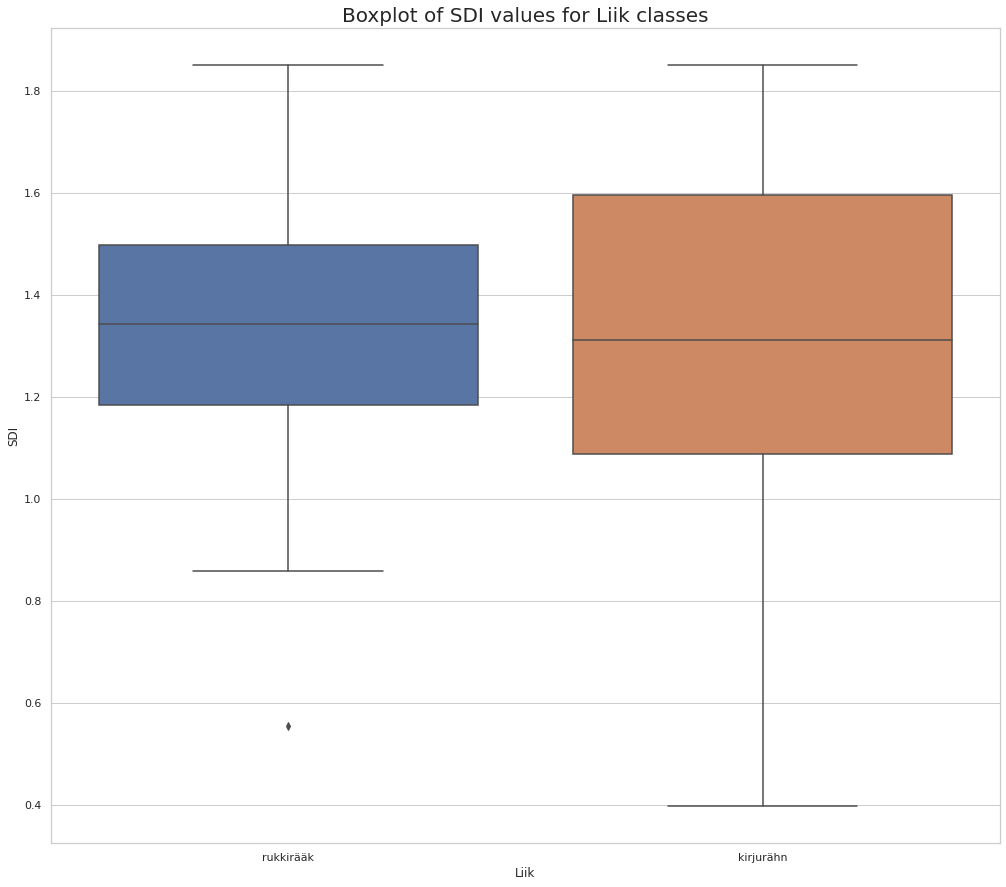

In [6]:
df['values_prep'] = pd.to_numeric(df[values], errors='coerce')

df = df.rename(columns={values : f"{values}_"})
df = df.rename(columns={'values_prep' : values})

fig, ax = plt.subplots(figsize=(17,15))

sns.boxplot(x=classes, y=values, data=df.dropna(subset=[classes, values]))

plt.title(f"Boxplot of {values} values for {classes} classes", fontsize=20)

plt.savefig('boxplots.png', bbox_inches='tight', transparent=False)
plt.show()

[download image here](boxplots.png)

Alternatively, just copy the image directly from the browser with mouse click.